# EAS DATA MINING

# Nanda Prasetya Pamungkas    06211440000028

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,KFold,ShuffleSplit,StratifiedShuffleSplit
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/australian/australian.dat"
names = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15']
data = pd.read_csv(url, names = names, sep = ' ')
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# PREPROCESSING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
A1     690 non-null int64
A2     690 non-null float64
A3     690 non-null float64
A4     690 non-null int64
A5     690 non-null int64
A6     690 non-null int64
A7     690 non-null float64
A8     690 non-null int64
A9     690 non-null int64
A10    690 non-null int64
A11    690 non-null int64
A12    690 non-null int64
A13    690 non-null int64
A14    690 non-null int64
A15    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


# Eksplorasi Data

In [4]:
X=data.iloc[:,0:14]
X_cont=data.iloc[:,(1,2,6,9,12,13)]
X_cate=data.iloc[:,(0,3,4,5,7,8,10,11)]
Y=data.iloc[:,14]

In [5]:
X_cont.describe()

,A2,A3,A7,A10,A13,A14
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568203,4.758725,2.223406,2.40000,184.014493,1018.385507
std,11.853273,4.978163,3.346513,4.86294,172.159274,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,1.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,6.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,396.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100001.000000


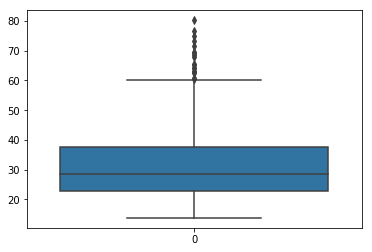

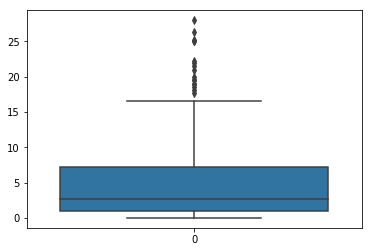

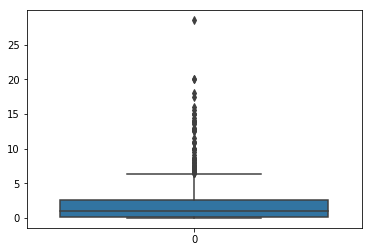

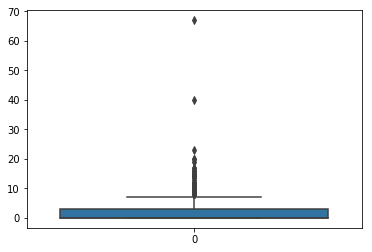

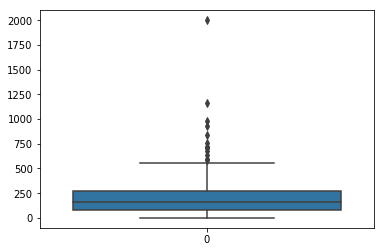

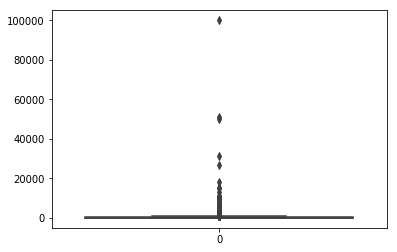

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

In [6]:
sns.boxplot(data=data.A2)
plt.show()
sns.boxplot(data=data.A3)
plt.show()
sns.boxplot(data=data.A7)
plt.show()
sns.boxplot(data=data.A10)
plt.show()
sns.boxplot(data=data.A13)
plt.show()
sns.boxplot(data=data.A14)
plt.show()
plt.xticks(rotation=90)

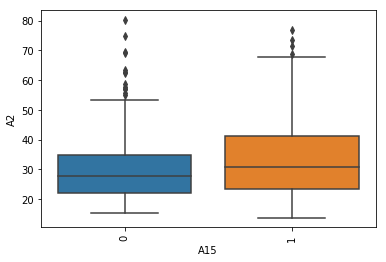

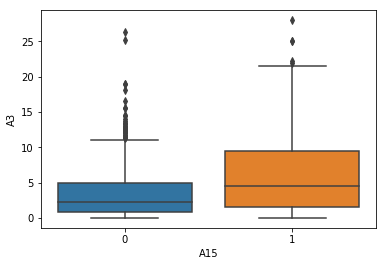

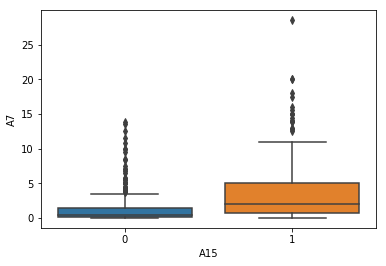

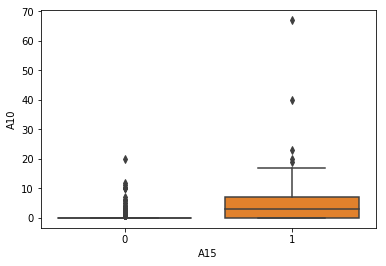

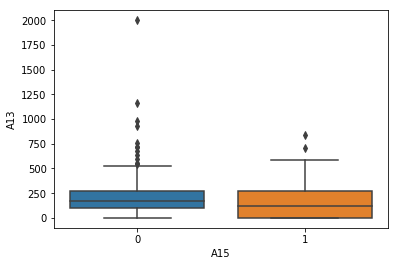

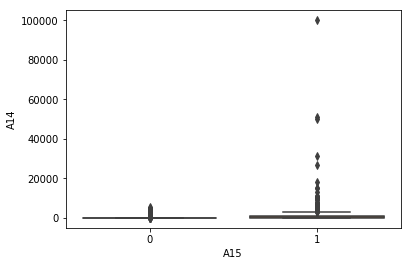

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

In [7]:
sns.boxplot(x='A15', y='A2', data=data)
plt.show()
sns.boxplot(x='A15', y='A3', data=data)
plt.show()
sns.boxplot(x='A15', y='A7', data=data)
plt.show()
sns.boxplot(x='A15', y='A10', data=data)
plt.show()
sns.boxplot(x='A15', y='A13', data=data)
plt.show()
sns.boxplot(x='A15', y='A14', data=data)
plt.show()
plt.xticks(rotation=90)

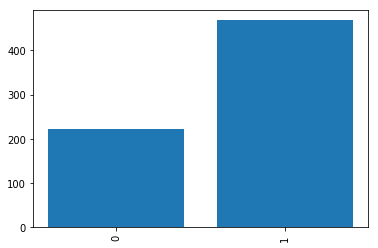

In [8]:
A1=data.groupby('A1').size().reset_index()
plt.bar(A1.iloc[:,0],A1[0])
plt.xticks(A1.iloc[:,0])
plt.show()

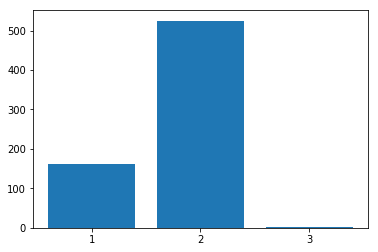

In [9]:
A4=data.groupby('A4').size().reset_index()
plt.bar(A4.iloc[:,0],A4[0])
plt.xticks(A4.iloc[:,0])
plt.show()

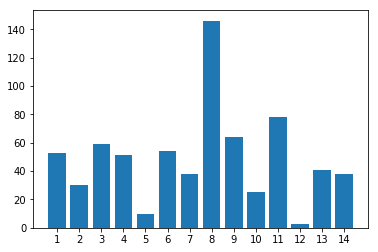

In [10]:
A5=data.groupby('A5').size().reset_index()
plt.bar(A5.iloc[:,0],A5[0])
plt.xticks(A5.iloc[:,0])
plt.show()

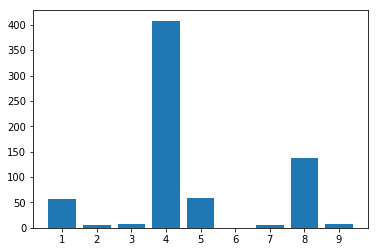

In [11]:
num=[1,2,3,4,5,6,7,8,9]
A6=data.groupby('A6').size().reset_index()
plt.bar(A6.iloc[:,0],A6[0])
plt.xticks(num)
plt.show()

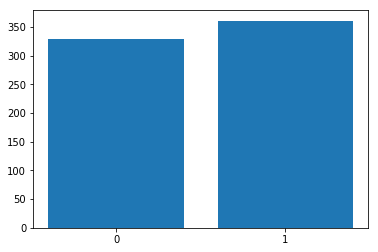

In [12]:
A8=data.groupby('A8').size().reset_index()
plt.bar(A8.iloc[:,0],A8[0])
plt.xticks(A8.iloc[:,0])
plt.show()

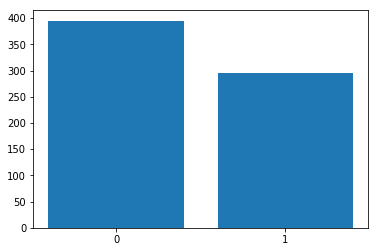

In [13]:
A9=data.groupby('A9').size().reset_index()
plt.bar(A9.iloc[:,0],A9[0])
plt.xticks(A9.iloc[:,0])
plt.show()

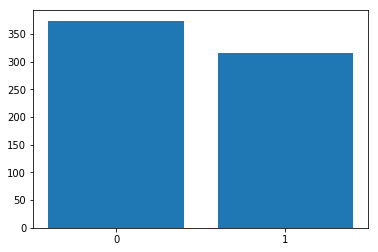

In [14]:
A11=data.groupby('A11').size().reset_index()
plt.bar(A11.iloc[:,0],A11[0])
plt.xticks(A11.iloc[:,0])
plt.show()

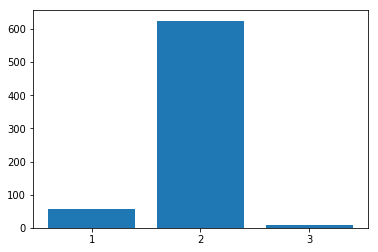

In [15]:
A12=data.groupby('A12').size().reset_index()
plt.bar(A12.iloc[:,0],A12[0])
plt.xticks(A12.iloc[:,0])
plt.show()

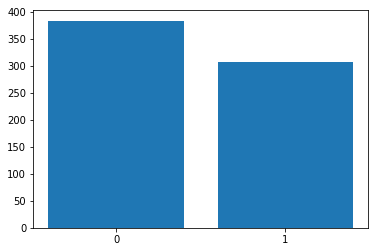

In [16]:
A15=data.groupby('A15').size().reset_index()
plt.bar(A15.iloc[:,0],A15[0])
plt.xticks(A15.iloc[:,0])
plt.show()

In [17]:
from sklearn.preprocessing import normalize
X_cont_stdz=normalize(X_cont)
X_cont_stdz=pd.DataFrame(X_cont_stdz,columns=['A2','A3','A7','A10','A13','A14'])
X_cont_stdz.head()

,A2,A3,A7,A10,A13,A14
0,0.018137,0.009414,0.001302,0.000000,0.082144,0.996410
1,0.140152,0.043276,0.001020,0.000000,0.989164,0.006182
2,0.105055,0.006215,0.004439,0.000000,0.994431,0.003552
3,0.805449,0.427442,0.000000,0.408857,0.000000,0.037169
4,0.117326,0.047524,0.011401,0.081436,0.349012,0.924881


In [18]:
X_dummy=pd.get_dummies(X_cate,columns=X_cate.columns)
X_dummy.head()

,A1_0,A1_1,A4_1,A4_2,A4_3,A5_1,A5_2,A5_3,A5_4,A5_5,...,A6_9,A8_0,A8_1,A9_0,A9_1,A11_0,A11_1,A12_1,A12_2,A12_3
0,0,1,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0


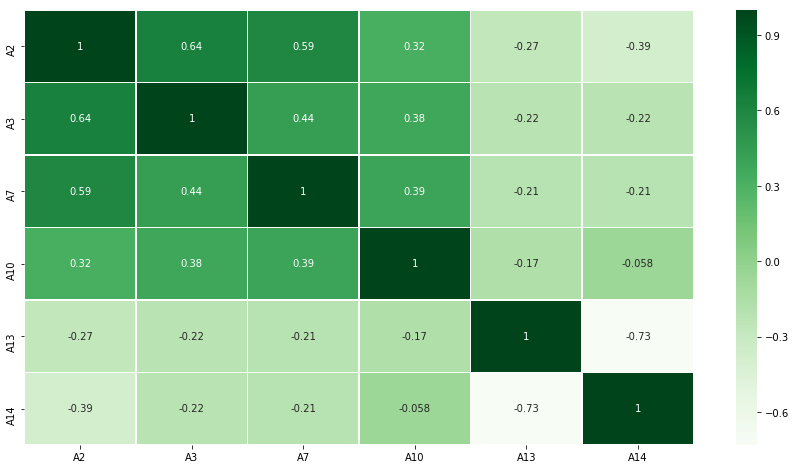

In [19]:
sns.heatmap(X_cont_stdz.corr(),linewidth=0.5,annot=True,cmap='Greens')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

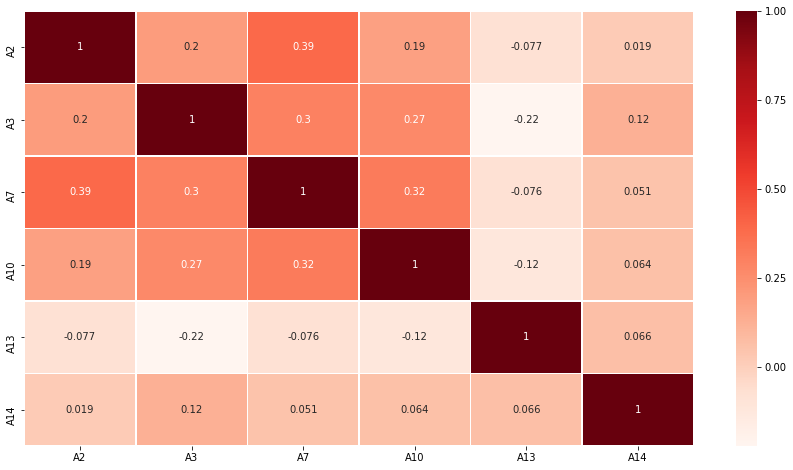

In [20]:
sns.heatmap(X_cont.corr(),linewidth=0.5,annot=True,cmap='Reds')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [21]:
X_new=X_cont_stdz.join(X_dummy)
X_new.head()

,A2,A3,A7,A10,A13,A14,A1_0,A1_1,A4_1,A4_2,...,A6_9,A8_0,A8_1,A9_0,A9_1,A11_0,A11_1,A12_1,A12_2,A12_3
0,0.018137,0.009414,0.001302,0.000000,0.082144,0.996410,0,1,0,1,...,0,1,0,1,0,0,1,0,1,0
1,0.140152,0.043276,0.001020,0.000000,0.989164,0.006182,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
2,0.105055,0.006215,0.004439,0.000000,0.994431,0.003552,1,0,1,0,...,0,1,0,1,0,0,1,0,1,0
3,0.805449,0.427442,0.000000,0.408857,0.000000,0.037169,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0
4,0.117326,0.047524,0.011401,0.081436,0.349012,0.924881,0,1,0,1,...,0,0,1,0,1,1,0,0,1,0


In [30]:
data.groupby('A1').size()

A1
0    222
1    468
dtype: int64

# Feature Engineering

In [21]:
test=SelectPercentile(f_classif,percentile=70)
test.fit(X_cont_stdz,Y)
test.get_support(indices=True)

array([2, 3, 4, 5])

In [22]:
X_select_cont=X_new.iloc[:,2:6]
X_select_cont.head()

,A7,A10,A13,A14
0,0.001302,0.000000,0.082144,0.996410
1,0.001020,0.000000,0.989164,0.006182
2,0.004439,0.000000,0.994431,0.003552
3,0.000000,0.408857,0.000000,0.037169
4,0.011401,0.081436,0.349012,0.924881


In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(X_select_cont)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

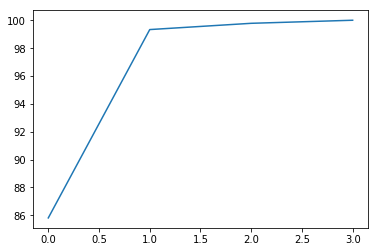

[ 0.85806711  0.13526874  0.00450841  0.00215574]


In [25]:
plt.plot(var1)
plt.show()
print(var)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
fit=pca.fit(X_select_cont)
X_cont_pca=pd.DataFrame(fit.transform(X_select_cont))
X_cont_pca.head()

,0
0,0.811582
1,-0.530437
2,-0.536005
3,0.186512
4,0.573885


In [27]:
X_fix=X_cont_pca.join(X_dummy)
X_fix.head()

,0,A1_0,A1_1,A4_1,A4_2,A4_3,A5_1,A5_2,A5_3,A5_4,...,A6_9,A8_0,A8_1,A9_0,A9_1,A11_0,A11_1,A12_1,A12_2,A12_3
0,0.811582,0,1,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
1,-0.530437,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,-0.536005,1,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
3,0.186512,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,0.573885,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0


In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X_fix,Y,test_size=0.2,random_state=0)

# Classification Method

In [29]:
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.784292 (0.049959)
CART: 0.835184 (0.023651)
SVM: 0.846077 (0.037840)
LR: 0.846077 (0.023185)


/home/nbuser/anaconda2_501/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.849730 (0.036617)
KNN: 0.865913 (0.039065)


In [30]:
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.769762 (0.058159)
CART: 0.822391 (0.036841)
SVM: 0.846028 (0.032937)
LR: 0.847862 (0.025032)
LDA: 0.851515 (0.036728)
KNN: 0.871335 (0.042733)


In [31]:
H=ShuffleSplit(n_splits=5, test_size=0.2, random_state=None)
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=H)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.814414 (0.030999)
CART: 0.814414 (0.020225)
SVM: 0.818018 (0.026967)
LR: 0.850450 (0.029386)
LDA: 0.846847 (0.015075)
KNN: 0.877477 (0.024573)


In [32]:
HS=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=None)
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=HS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.772973 (0.019238)
CART: 0.801802 (0.024836)
SVM: 0.818018 (0.023074)
LR: 0.846847 (0.015075)
LDA: 0.861261 (0.031519)
KNN: 0.861261 (0.028260)


# Parameter Tuning

In [33]:
model1 = DecisionTreeClassifier()
param={'criterion':['gini','entropy'], 
       'max_depth':[1,2,3,4,5,6,7,8,9,10],
       'splitter':['best','random'],
       'max_leaf_nodes':[2,3,4,5,6,7,None], 
       'min_samples_leaf':[1,2,3,4,5,6,7,0.1,0.2,0.3,0.4,0.5],
       'min_samples_split':[2,3,4,5,6,7,0.1,0.2,0.3,0.4,0.5]}
grid = GridSearchCV(model1, param, n_jobs=-1, verbose=True)
grid.fit(X_fix, Y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 36960 candidates, totalling 110880 fits


[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 5896 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 11496 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 18696 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 27496 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 37896 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 49896 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 63496 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 78696 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 95496 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 110880 out of 110880 | elapsed:  4.4min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'splitter': ['best', 'random'], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 0.1, 0.2, 0.3, 0.4, 0.5], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 0.1, 0.2, 0.3, 0.4, 0.5], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)
0.873913043478
{'splitter': 'random', 'max_leaf_nodes': 6, 'min_samples_leaf': 5, 'criterion': 'gini', 'min_samples_split': 4, 'max_depth': 4}


In [73]:
param2={'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
     'kernel':['linear','poly', 'rbf','sigmoid'],
     'gamma':['auto',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] 
}
grid = GridSearchCV(SVC(), param2,n_jobs=-1, verbose=True)
grid.fit(X_fix, Y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)


Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.2s


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'gamma': ['auto', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)
0.869565217391
{'kernel': 'poly', 'C': 0.1, 'gamma': 0.1}


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    6.1s finished


In [42]:
param3={'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
        'penalty':['l1','l2'],
        'random_state':[None,1,2,3,4,5,6,7]}
grid1 = GridSearchCV(LogisticRegression(), param3,n_jobs=-1, verbose=True)
grid1.fit(X_fix, Y)
print(grid)
# summarize the results of the grid search
print(grid1.best_score_)
print(grid1.best_params_)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    2.3s


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'random_state': [None, 1, 2, 3, 4, 5, 6, 7], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)
0.860869565217
{'penalty': 'l2', 'C': 0.3, 'random_state': None}


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:    7.5s finished


In [50]:
param4={'solver':['svd','lsqr'],
        'store_covariance':[True,False]}
grid = GridSearchCV(LinearDiscriminantAnalysis(), param4,n_jobs=-1, verbose=True)
grid.fit(X_fix, Y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'store_covariance': [True, False], 'solver': ['svd', 'lsqr']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)
0.855072463768
{'store_covariance': True, 'solver': 'svd'}


In [54]:
param5={'n_neighbors':[5,10,20,40,80,100,200],
        'weights':['uniform','distance'],
        'algorithm':['ball_tree','kd_tree','brute','auto'],
        'leaf_size':[30,60,100,200,500],
        'p':[2,4,5,10,50]}
grid = GridSearchCV(KNeighborsClassifier(), param5,n_jobs=-1, verbose=True)
grid.fit(X_fix, Y)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 336 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 586 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1936 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2586 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3336 tasks      | elapsed:  3.1min


GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5, 10, 20, 40, 80, 100, 200], 'weights': ['uniform', 'distance'], 'leaf_size': [30, 60, 100, 200, 500], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'], 'p': [2, 4, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=True)
0.876811594203
{'n_neighbors': 80, 'weights': 'uniform', 'leaf_size': 30, 'algorithm': 'ball_tree', 'p': 2}


[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:  3.8min finished


In [74]:
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(splitter= 'random',max_leaf_nodes= 6, 
                                              min_samples_leaf= 5,criterion= 'gini', 
                                              min_samples_split= 4, max_depth= 4)))
models.append(('SVM', SVC(kernel='poly',C=0.1,gamma=0.1)))
models.append(('LR', LogisticRegression(penalty= 'l2', C= 0.3, random_state= None)))
models.append(('LDA', LinearDiscriminantAnalysis(store_covariance= True, solver= 'svd')))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 80, weights= 'uniform', leaf_size= 30, algorithm= 'ball_tree', 
                                           p= 2)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.784292 (0.049959)
CART: 0.865897 (0.038785)
SVM: 0.871368 (0.026456)
LR: 0.844259 (0.024210)
LDA: 0.849730 (0.036617)
KNN: 0.882244 (0.025533)


In [75]:
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(splitter= 'random',max_leaf_nodes= 6, 
                                              min_samples_leaf= 5,criterion= 'gini', 
                                              min_samples_split= 4, max_depth= 4)))
models.append(('SVM', SVC(kernel='poly',C=0.1,gamma=0.1)))
models.append(('LR', LogisticRegression(penalty= 'l2', C= 0.3, random_state= None)))
models.append(('LDA', LinearDiscriminantAnalysis(store_covariance= True, solver= 'svd')))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 80, weights= 'uniform', leaf_size= 30, algorithm= 'ball_tree', 
                                           p= 2)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, random_state=0)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.769762 (0.058159)
CART: 0.869500 (0.035407)
SVM: 0.865930 (0.025239)
LR: 0.849681 (0.027628)
LDA: 0.851515 (0.036728)
KNN: 0.880426 (0.037265)


In [76]:
H=ShuffleSplit(n_splits=5, test_size=0.2, random_state=None)
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(splitter= 'random',max_leaf_nodes= 6, 
                                              min_samples_leaf= 5,criterion= 'gini', 
                                              min_samples_split= 4, max_depth= 4)))
models.append(('SVM', SVC(kernel='poly',C=0.1,gamma=0.1)))
models.append(('LR', LogisticRegression(penalty= 'l2', C= 0.3, random_state= None)))
models.append(('LDA', LinearDiscriminantAnalysis(store_covariance= True, solver= 'svd')))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 80, weights= 'uniform', leaf_size= 30, algorithm= 'ball_tree', 
                                           p= 2)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=H)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.807207 (0.050192)
CART: 0.877477 (0.013483)
SVM: 0.857658 (0.033901)
LR: 0.854054 (0.029825)
LDA: 0.845045 (0.029825)
KNN: 0.872072 (0.026967)


In [77]:
HS=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=None)
# Spot Check Algorithms
models = []
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier(splitter= 'random',max_leaf_nodes= 6, 
                                              min_samples_leaf= 5,criterion= 'gini', 
                                              min_samples_split= 4, max_depth= 4)))
models.append(('SVM', SVC(kernel='poly',C=0.1,gamma=0.1)))
models.append(('LR', LogisticRegression(penalty= 'l2', C= 0.3, random_state= None)))
models.append(('LDA', LinearDiscriminantAnalysis(store_covariance= True, solver= 'svd')))
models.append(('KNN', KNeighborsClassifier(n_neighbors= 80, weights= 'uniform', leaf_size= 30, algorithm= 'ball_tree', 
                                           p= 2)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, Y_train, cv=HS)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.794595 (0.033901)
CART: 0.855856 (0.023493)
SVM: 0.872072 (0.019238)
LR: 0.846847 (0.015075)
LDA: 0.866667 (0.019238)
KNN: 0.911712 (0.025096)
